In [3]:
print("I'm learning how to use git and github!")

I'm learning how to use git and github!


In [1]:
print("jupyter notebook")

jupyter notebook


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

'1'
data = pd.read_csv('employee_promotion.csv')
data.sample(15)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
31787,37775,Sales & Marketing,region_13,Bachelor's,m,sourcing,1,46,3.0,18,0,48.0,0
7226,27266,HR,region_2,Bachelor's,m,other,1,36,2.0,4,0,52.0,0
34201,1669,Analytics,region_2,Master's & above,f,other,2,35,3.0,8,0,85.0,0
50583,28654,Technology,region_26,Bachelor's,f,sourcing,1,42,4.0,13,0,80.0,0
35329,35235,Sales & Marketing,region_31,Bachelor's,m,other,1,28,NaN,1,0,47.0,0
51071,54153,Sales & Marketing,region_11,Bachelor's,m,other,1,36,1.0,8,0,52.0,0
32203,17225,Procurement,region_7,Bachelor's,m,other,2,32,4.0,5,0,70.0,0
46187,33962,Analytics,region_15,Bachelor's,m,other,2,32,4.0,4,0,86.0,0
39197,3058,Sales & Marketing,region_31,unknown,m,sourcing,1,32,1.0,7,0,46.0,0
2956,55609,Finance,region_28,Bachelor's,f,sourcing,1,30,5.0,7,0,60.0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [6]:
data.describe(include='object')

,department,region,education,gender,recruitment_channel
count,54808,54808,54808,54808,54808
unique,9,34,4,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [11]:
for column in data[['department','education','gender','recruitment_channel']]:
    print(column,'-',data[column].unique())

department - ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
education - ["Master's & above" "Bachelor's" 'unknown' 'Below Secondary']
gender - ['f' 'm']
recruitment_channel - ['sourcing' 'other' 'referred']


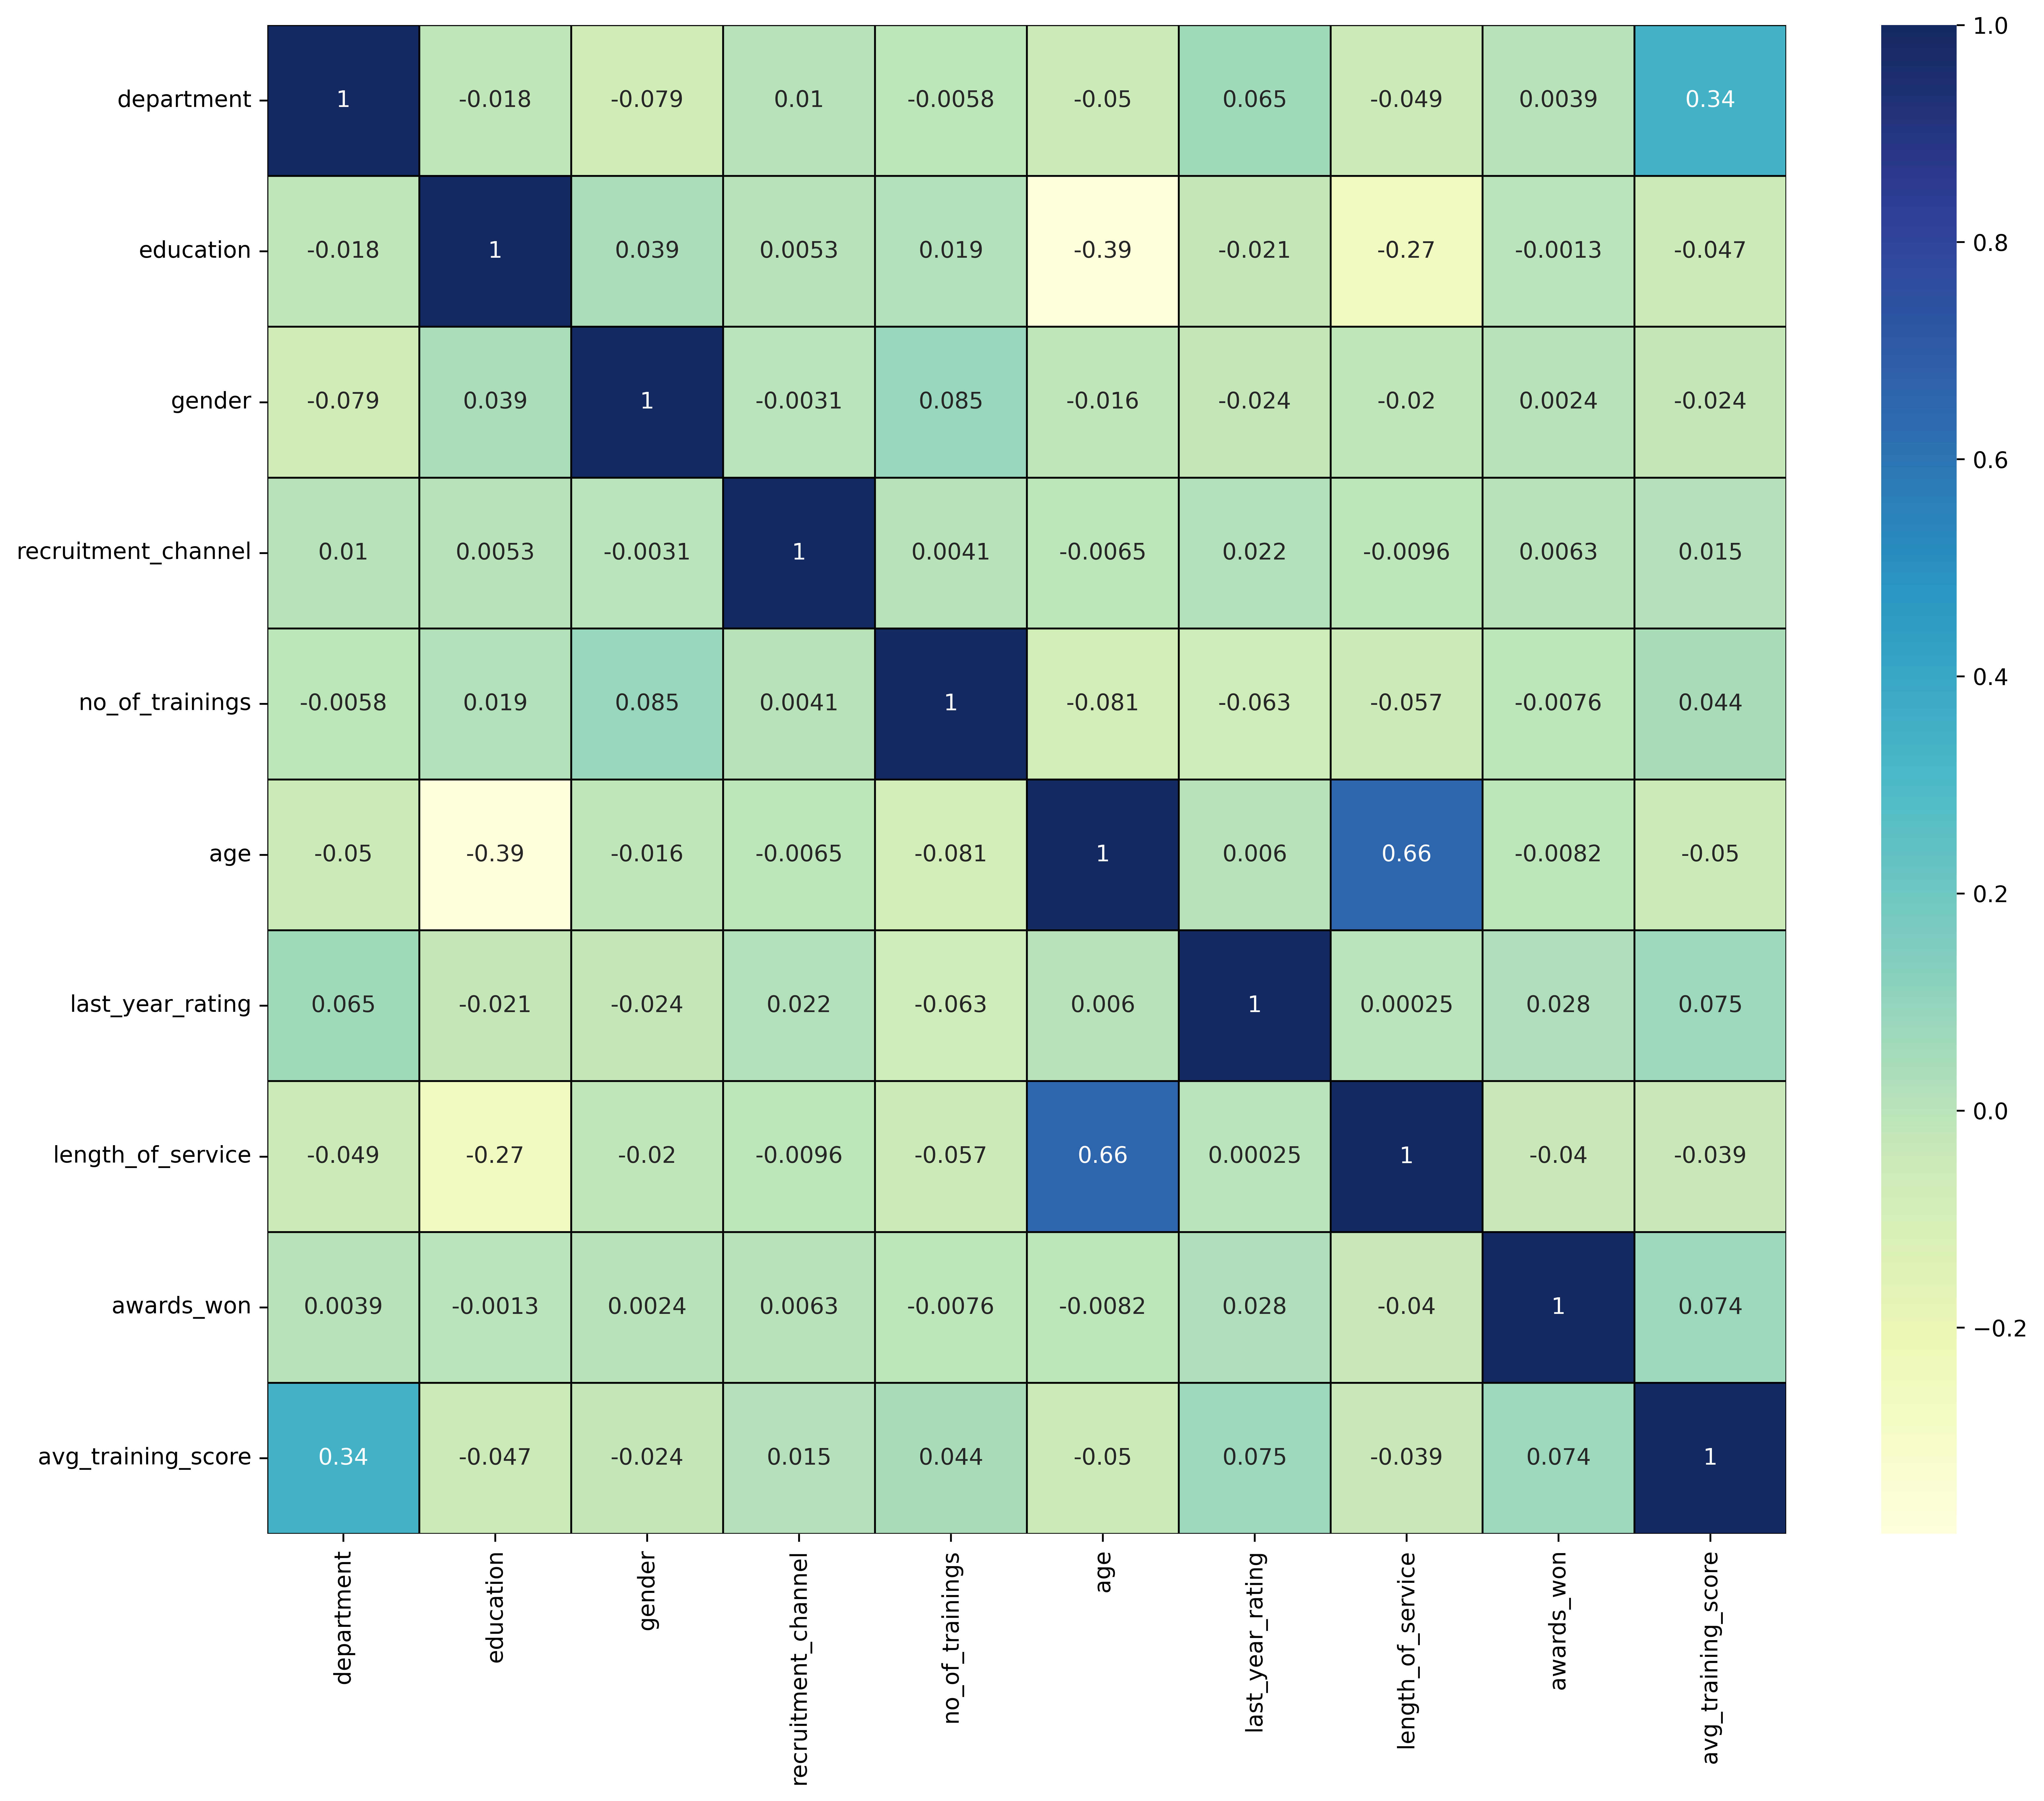

In [3]:
df_model=data.rename(columns={'previous_year_rating':'last_year_rating'})
df_model.department=df_model.department.map({'Sales & Marketing':0, 'Operations':1, 'Technology':2, 'Analytics':3, 'R&D':4, 'Procurement':5, 'Finance':6, 'HR':7, 'Legal':8})
df_model.education=df_model.education.map({"Master's & above":0, "Bachelor's":1, 'unknown':2, 'Below Secondary':3})
df_model.gender=df_model.gender.map({'f':0, 'm':1})
df_model.recruitment_channel=df_model.recruitment_channel.map({'sourcing':0,'other':1,'referred':2})
df_model_drop=df_model.drop(['employee_id','region','is_promoted'],axis=1)
fig=plt.figure(figsize=(15,12),dpi=600)
ax=sns.heatmap(df_model_drop.corr(),cmap="YlGnBu",linecolor='black',lw=.65,annot=True,alpha=.95)
plt.show()